In [1]:
from sqlalchemy import create_engine
import pandas as pd
import os
from io import StringIO

In [2]:
engine = create_engine(os.environ['DATABASE_URL'])

df = pd.read_sql_query(
    'select * from products as p, "complaints-users" as c where p.product_id=c.product_id', 
    con=engine
)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(columns=['date', 'was_user_disputed', 'complaint_id', 'issue_id'])
df.head()

,product_id,main_product,sub_product,complaint_text
0,26,"Credit reporting, credit repair services, or o...",Credit reporting,XXXX and Transunion are reporting incorrectly...
1,26,"Credit reporting, credit repair services, or o...",Credit reporting,XXXX and Transunion are reporting incorrectly ...
2,26,"Credit reporting, credit repair services, or o...",Credit reporting,"XXXX, XXXX, and Experian need to remove the co..."
3,26,"Credit reporting, credit repair services, or o...",Credit reporting,"3 company with inconsistencies, violations and..."
4,26,"Credit reporting, credit repair services, or o...",Credit reporting,I have a personal loan from Patriot finance. T...


In [3]:
df = df[pd.notnull(df['complaint_text'])]
category_id_df = df[['main_product', 'product_id']].drop_duplicates().sort_values('product_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['product_id', 'main_product']].values)
df.head()

,product_id,main_product,sub_product,complaint_text
0,26,"Credit reporting, credit repair services, or o...",Credit reporting,XXXX and Transunion are reporting incorrectly...
1,26,"Credit reporting, credit repair services, or o...",Credit reporting,XXXX and Transunion are reporting incorrectly ...
2,26,"Credit reporting, credit repair services, or o...",Credit reporting,"XXXX, XXXX, and Experian need to remove the co..."
3,26,"Credit reporting, credit repair services, or o...",Credit reporting,"3 company with inconsistencies, violations and..."
4,26,"Credit reporting, credit repair services, or o...",Credit reporting,I have a personal loan from Patriot finance. T...


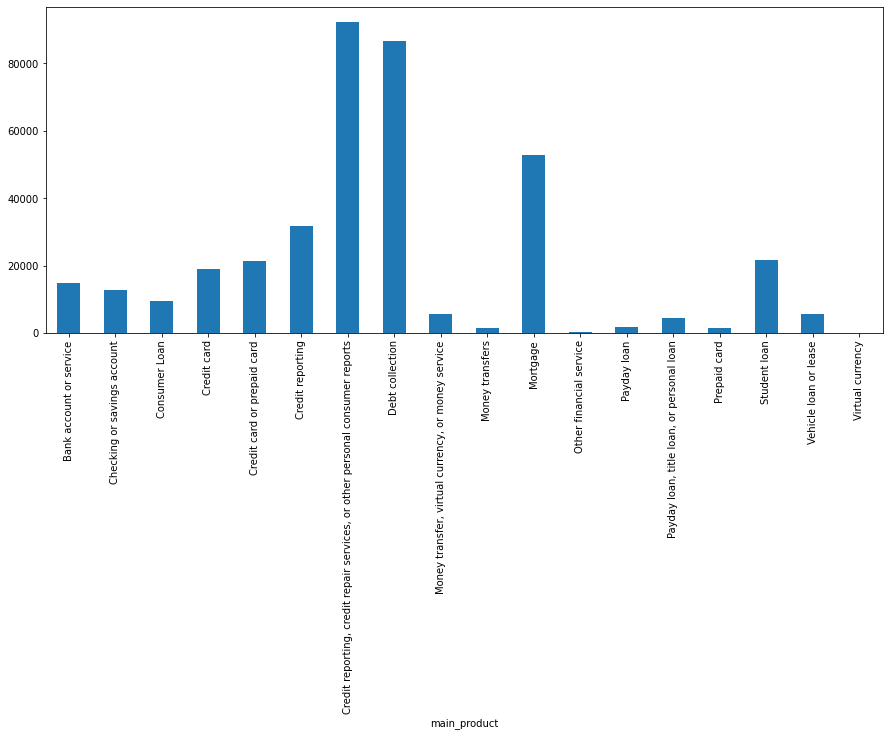

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
d = df.groupby('main_product').complaint_text.count().plot.bar(ylim=0)